In [3]:
from keras.models import load_model
import cv2
import matplotlib.pyplot as plt
import numpy as np

# chargement du modèle pré-entraîné xception
model = load_model('/mnt/c/Users/steph/OneDrive/Images/Rakuten/save_data/model.h5/Xception/checkpoint_Xception_model.h5')

2023-09-18 13:02:32.478479: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-18 13:02:32.590550: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


# Test sur des images du dossier image_test

modification de la profondeur de l'image en 8 bits (CV_8U) \
profondeur de l'image en 64 bits (CV_64F) : conversion en RVB avec cv2.IMREAD_COLOR non pris en charge 

Type de l'image :  uint8
1/1 [==============================] - 0s 108ms/step


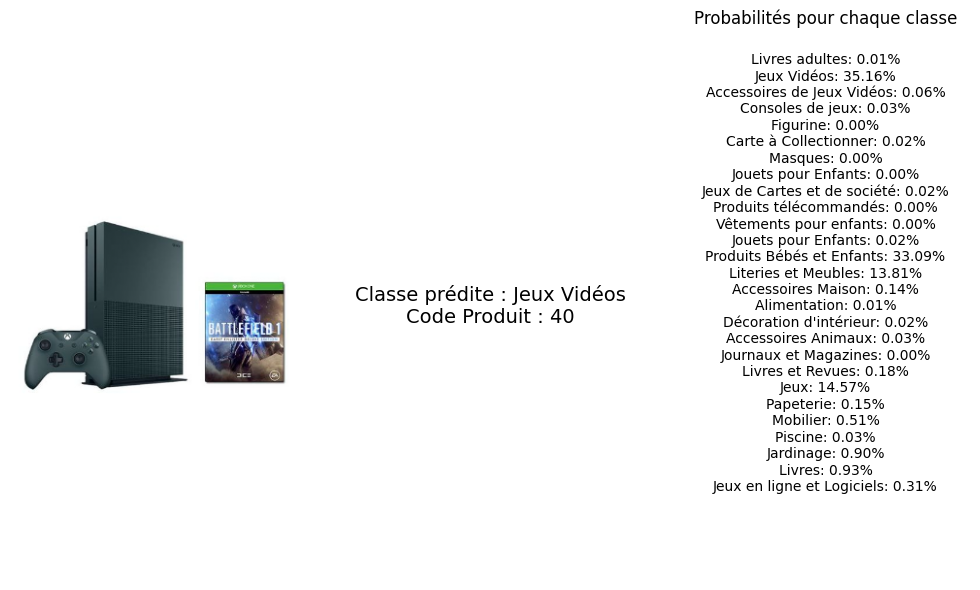

In [101]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Chemin de l'image à prédire
img_path = '/mnt/c/Users/steph/OneDrive/Images/Rakuten/images/image_test/image_1268253920_product_1585204775.jpg'

# Chargement l'image avec OpenCV en utilisant cv2.IMREAD_COLOR
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

# Vérification le type de l'image
print("Type de l'image : ", img.dtype)

# Redimensionnement de l'image aux dimensions d'entrée du modèle (299x299)
img = cv2.resize(img, (299, 299))

# Modification de la profondeur de l'image en 8 bits (CV_8U) 
img = img.astype(np.uint8)

# Normalisez l'image 
img = img / 255.0

# Ajout d'une dimension pour correspondre aux attentes du modèle
img = np.expand_dims(img, axis=0)

# Prédiction avec le modèle xception
predictions = model.predict(img)

# Classe prédite en utilisant argmax
predicted_class = np.argmax(predictions, axis=1)

# Calcul des probabilités en pourcentage pour chaque classe
class_probabilities = predictions[0] * 100  

# Liste des labels
labels = ["Livres adultes", "Jeux Vidéos", "Accessoires de Jeux Vidéos", "Consoles de jeux", "Figurine", "Carte à Collectionner",
          "Masques", "Jouets pour Enfants", "Jeux de Cartes et de société", "Produits télécommandés",
          "Vêtements pour enfants", "Jouets pour Enfants", "Produits Bébés et Enfants",
          "Literies et Meubles", "Accessoires Maison", "Alimentation", "Décoration d'intérieur", "Accessoires Animaux",
          "Journaux et Magazines", "Livres et Revues", "Jeux", "Papeterie",
          "Mobilier", "Piscine", "Jardinage", "Livres", "Jeux en ligne et Logiciels"]

# Code produit associé aux classes
code_produit = [10, 40, 50, 60, 1140, 1160, 1180, 1280, 1281,
                1300, 1301, 1302, 1320, 1560, 1920, 1940, 2060,
                2220, 2280, 2403, 2462, 2522, 2582, 2583,
                2585, 2705, 2905]

# Association des classes prédites pour les labels et les codes produits
predicted_label = labels[predicted_class[0]]
predicted_code = code_produit[predicted_class[0]]

# figure comprenant 1 ligne et 3 colonnes
fig, axs = plt.subplots(1, 3, figsize=(10, 6))


# Affichage de l'image dans la première colonne
axs[0].imshow(img[0])
axs[0].axis('off')

# Affichage de la classe prédite avec le code produit dans la deuxième colonne
axs[1].text(0.5, 0.5, f"Classe prédite : {predicted_label}\nCode Produit : {predicted_code}", ha='center', va='center', fontsize=14)
axs[1].axis('off')

# Affichage des probabilités pour chaque classe dans la troisième colonne
axs[2].text(0.5, 0.5, "", ha='center', va='center', fontsize=12)
for i, (label, prob) in enumerate(zip(labels, class_probabilities)):
    axs[2].text(0.5, 0.95 - 0.03 * i, f"{label}: {prob:.2f}%", ha='center', va='center', fontsize=10)
axs[2].axis('off')
axs[2].set_title('Probabilités pour chaque classe')

# Ajustement de l'espacement entre les graphiques
plt.tight_layout()

plt.show()


Type de l'image :  uint8
1/1 [==============================] - 0s 103ms/step


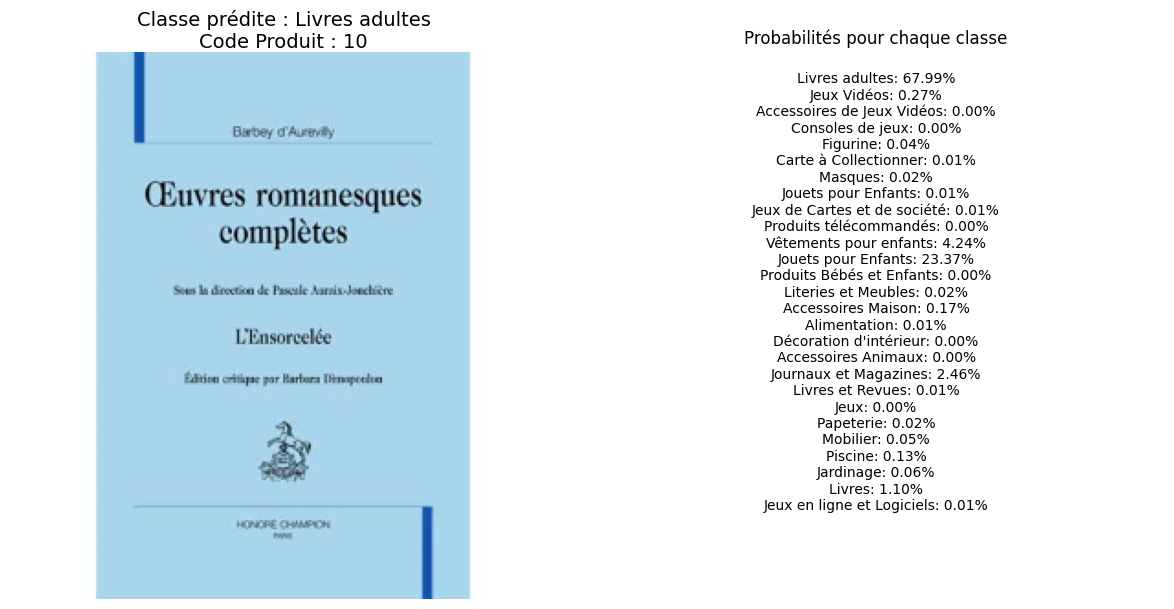

In [105]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img_path = '/mnt/c/Users/steph/OneDrive/Images/Rakuten/images/image_test/image_1274734001_product_299182258.jpg'

# Chargement l'image avec OpenCV en utilisant cv2.IMREAD_COLOR
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

# Vérification du type de l'image
print("Type de l'image : ", img.dtype)

# Redimensionnement de l'image aux dimensions d'entrée du modèle (299x299)
img = cv2.resize(img, (299, 299))

# Modification de la profondeur de l'image en 8 bits (CV_8U) 
img = img.astype(np.uint8)

# Normalisation l'image 
img = img / 255.0

# Ajout d'une dimension pour correspondre aux attentes du modèle
img = np.expand_dims(img, axis=0)

# Prédiction avec le modèle xception
predictions = model.predict(img)

# Classe prédite en utilisant argmax
predicted_class = np.argmax(predictions, axis=1)

# Calcul des probabilités en pourcentage pour chaque classe
class_probabilities = predictions[0] * 100  

# Liste des labels
labels = ["Livres adultes", "Jeux Vidéos", "Accessoires de Jeux Vidéos", "Consoles de jeux", "Figurine", "Carte à Collectionner",
          "Masques", "Jouets pour Enfants", "Jeux de Cartes et de société", "Produits télécommandés",
          "Vêtements pour enfants", "Jouets pour Enfants", "Produits Bébés et Enfants",
          "Literies et Meubles", "Accessoires Maison", "Alimentation", "Décoration d'intérieur", "Accessoires Animaux",
          "Journaux et Magazines", "Livres et Revues", "Jeux", "Papeterie",
          "Mobilier", "Piscine", "Jardinage", "Livres", "Jeux en ligne et Logiciels"]

# Code produit associé aux classes
code_produit = [10, 40, 50, 60, 1140, 1160, 1180, 1280, 1281,
                1300, 1301, 1302, 1320, 1560, 1920, 1940, 2060,
                2220, 2280, 2403, 2462, 2522, 2582, 2583,
                2585, 2705, 2905]

# Association des classes prédites aux labels et au code produit
predicted_label = labels[predicted_class[0]]
predicted_code = code_produit[predicted_class[0]]

# Affichage avec 1 ligne et 2 colonnes
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Affichage de la classe prédite avec la classe prédite et le code produit dans la première colonne  
axs[0].imshow(img[0])
axs[0].axis('off')
axs[0].set_title(f"Classe prédite : {predicted_label}\nCode Produit : {predicted_code}", ha='center', va='center', fontsize=14)

# Affichage des probabilités pour chaque classe dans la deuxième colonne
axs[1].text(0.5, 0.5, "", ha='center', va='center', fontsize=12)
for i, (label, prob) in enumerate(zip(labels, class_probabilities)):
    axs[1].text(0.5, 0.95 - 0.03 * i, f"{label}: {prob:.2f}%", ha='center', va='center', fontsize=10)
axs[1].axis('off')
axs[1].set_title('Probabilités pour chaque classe')

# Ajustement entre les graphiques
plt.tight_layout()

plt.show()


# Test sur des images du dossier image_train

Type de l'image :  uint8
1/1 [==============================] - 0s 120ms/step


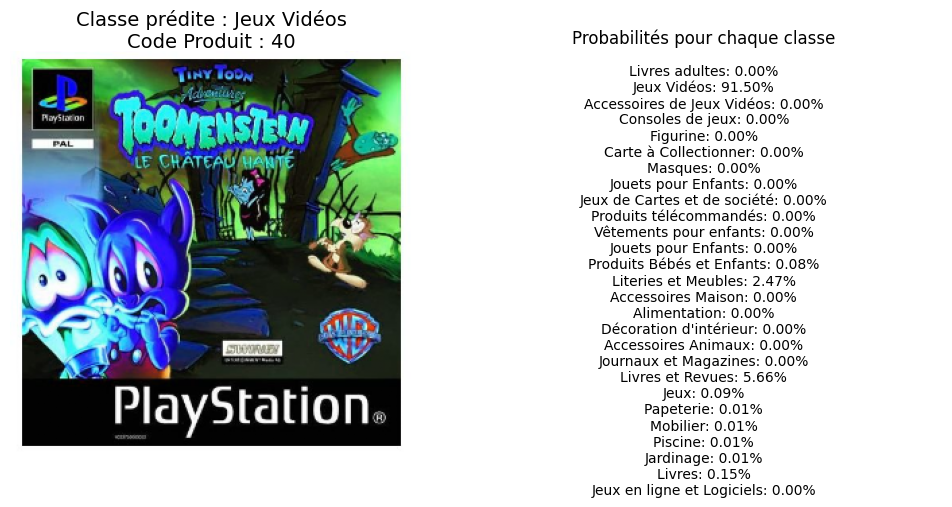

In [108]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


img_path = '/mnt/c/Users/steph/OneDrive/Images/Rakuten/images/image_train/image_234234_product_184251.jpg'

# Chargement de l'image avec OpenCV en utilisant cv2.IMREAD_COLOR
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

# Vérification du type de l'image
print("Type de l'image : ", img.dtype)

# Redimensionnement de l'image aux dimensions d'entrée du modèle (299x299)
img = cv2.resize(img, (299, 299))

# Modification de la profondeur de l'image en 8 bits (CV_8U) 
img = img.astype(np.uint8)

# Normalisation de l'image 
img = img / 255.0

# Ajout d'une dimension pour correspondre aux attentes du modèle
img = np.expand_dims(img, axis=0)

# Prédiction avec le modèle xception
predictions = model.predict(img)

# Classe prédite en utilisant argmax
predicted_class = np.argmax(predictions, axis=1)

# Calcul des probabilités en pourcentage pour chaque classe
class_probabilities = predictions[0] * 100 

# Liste des labels
labels = ["Livres adultes", "Jeux Vidéos", "Accessoires de Jeux Vidéos", "Consoles de jeux", "Figurine", "Carte à Collectionner",
          "Masques", "Jouets pour Enfants", "Jeux de Cartes et de société", "Produits télécommandés",
          "Vêtements pour enfants", "Jouets pour Enfants", "Produits Bébés et Enfants",
          "Literies et Meubles", "Accessoires Maison", "Alimentation", "Décoration d'intérieur", "Accessoires Animaux",
          "Journaux et Magazines", "Livres et Revues", "Jeux", "Papeterie",
          "Mobilier", "Piscine", "Jardinage", "Livres", "Jeux en ligne et Logiciels"]

# Code produit associé aux classes
code_produit = [10, 40, 50, 60, 1140, 1160, 1180, 1280, 1281,
                1300, 1301, 1302, 1320, 1560, 1920, 1940, 2060,
                2220, 2280, 2403, 2462, 2522, 2582, 2583,
                2585, 2705, 2905]

# Association des classes prédites pour les labels et les codes produits
predicted_label = labels[predicted_class[0]]
predicted_code = code_produit[predicted_class[0]]

# Figure comprenant 1 ligne et 2 colonnes
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Affichage de la classe prédite avec la classe prédite et le code produit dans la première colonne  
axs[0].imshow(img[0])
axs[0].axis('off')
axs[0].set_title(f"Classe prédite : {predicted_label}\nCode Produit : {predicted_code}", ha='center', va='center', fontsize=14)

# Affichage des probabilités pour chaque classe dans la deuxième colonne
axs[1].text(0.5, 0.5, "", ha='center', va='center', fontsize=12)
for i, (label, prob) in enumerate(zip(labels, class_probabilities)):
    axs[1].text(0.5, 0.95 - 0.04 * i, f"{label}: {prob:.2f}%", ha='center', va='center', fontsize=10)
axs[1].axis('off')
axs[1].set_title('Probabilités pour chaque classe')

# Ajustement de l'espacement entre les graphiques
plt.tight_layout()

plt.show()


Type de l'image :  uint8
1/1 [==============================] - 0s 93ms/step


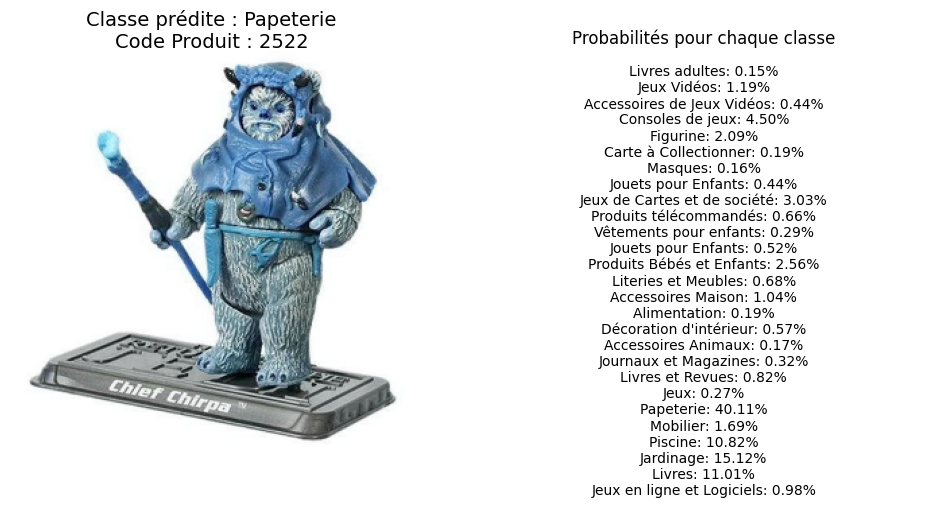

In [120]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Chemin de l'image à prédire
img_path = '/mnt/c/Users/steph/OneDrive/Images/Rakuten/images/image_train/image_1240232652_product_3745064721.jpg'

# Chargement de l'image avec OpenCV en utilisant cv2.IMREAD_COLOR
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

# Vérification du type de l'image
print("Type de l'image : ", img.dtype)

# Redimensionnement de l'image aux dimensions d'entrée du modèle (299x299)
img = cv2.resize(img, (299, 299))

# Modification de la profondeur de l'image en 8 bits (CV_8U) 
img = img.astype(np.uint8)

# Normalisation de l'image
img = img / 255.0

# Ajout d'une dimension pour correspondre aux attentes du modèle
img = np.expand_dims(img, axis=0)

# Prédiction avec le modèle xception
predictions = model.predict(img)

# Classe prédite en utilisant argmax
predicted_class = np.argmax(predictions, axis=1)

# Calcul des probabilités en pourcentage pour chaque classe
class_probabilities = predictions[0] * 100  

# Liste des labels
labels = ["Livres adultes", "Jeux Vidéos", "Accessoires de Jeux Vidéos", "Consoles de jeux", "Figurine", "Carte à Collectionner",
          "Masques", "Jouets pour Enfants", "Jeux de Cartes et de société", "Produits télécommandés",
          "Vêtements pour enfants", "Jouets pour Enfants", "Produits Bébés et Enfants",
          "Literies et Meubles", "Accessoires Maison", "Alimentation", "Décoration d'intérieur", "Accessoires Animaux",
          "Journaux et Magazines", "Livres et Revues", "Jeux", "Papeterie",
          "Mobilier", "Piscine", "Jardinage", "Livres", "Jeux en ligne et Logiciels"]

# Code produit associé aux classes
code_produit = [10, 40, 50, 60, 1140, 1160, 1180, 1280, 1281,
                1300, 1301, 1302, 1320, 1560, 1920, 1940, 2060,
                2220, 2280, 2403, 2462, 2522, 2582, 2583,
                2585, 2705, 2905]

# Association des classes prédites pour les labels et les codes produits
predicted_label = labels[predicted_class[0]]
predicted_code = code_produit[predicted_class[0]]

# Figure comprenant 1 ligne et 2 colonnes
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Affichage de la classe prédite avec la classe prédite et le code produit dans la première colonne  
axs[0].imshow(img[0])
axs[0].axis('off')
axs[0].set_title(f"Classe prédite : {predicted_label}\nCode Produit : {predicted_code}", ha='center', va='center', fontsize=14)

# Affichage des probabilités pour chaque classe dans la deuxième colonne
axs[1].text(0.5, 0.5, "", ha='center', va='center', fontsize=12)
for i, (label, prob) in enumerate(zip(labels, class_probabilities)):
    axs[1].text(0.5, 0.95 - 0.04 * i, f"{label}: {prob:.2f}%", ha='center', va='center', fontsize=10)
axs[1].axis('off')
axs[1].set_title('Probabilités pour chaque classe')

# Ajustement de l'espacement entre les graphiques
plt.tight_layout()

plt.show()


Type de l'image :  uint8
1/1 [==============================] - 0s 111ms/step


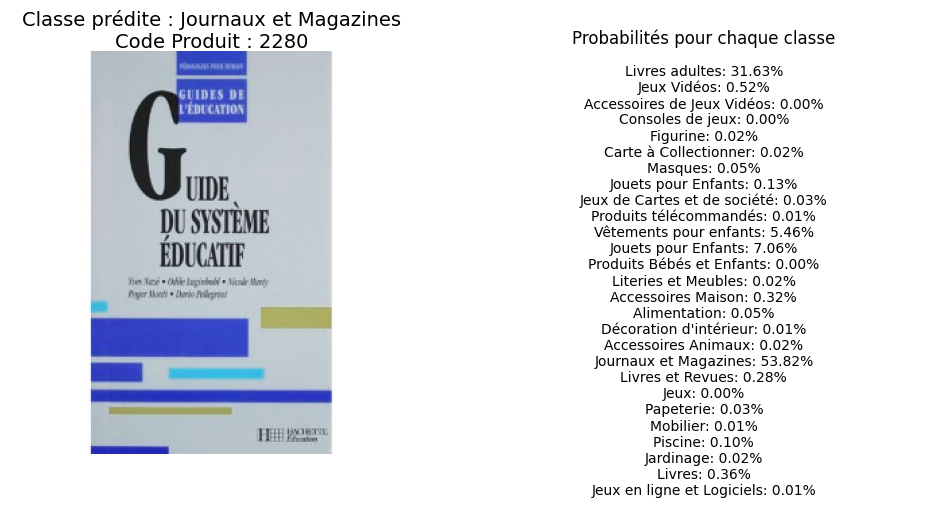

In [127]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Chemin de l'image à prédire
img_path = '/mnt/c/Users/steph/OneDrive/Images/Rakuten/images/image_train/image_1242846779_product_1100407140.jpg'

# Chargement de l'image avec OpenCV en utilisant cv2.IMREAD_COLOR
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

# Vérification du type de l'image
print("Type de l'image : ", img.dtype)

# Redimensionnement de l'image aux dimensions d'entrée du modèle (299x299)
img = cv2.resize(img, (299, 299))

# Modification de la profondeur de l'image en 8 bits (CV_8U) 
img = img.astype(np.uint8)

# Normalisation de l'image
img = img / 255.0

# Ajout d'une dimension pour correspondre aux attentes du modèle
img = np.expand_dims(img, axis=0)

# Prédiction avec le modèle xception
predictions = model.predict(img)

# Classe prédite en utilisant argmax
predicted_class = np.argmax(predictions, axis=1)

# Calcul des probabilités en pourcentage pour chaque classe
class_probabilities = predictions[0] * 100 

# Liste des labels
labels = ["Livres adultes", "Jeux Vidéos", "Accessoires de Jeux Vidéos", "Consoles de jeux", "Figurine", "Carte à Collectionner",
          "Masques", "Jouets pour Enfants", "Jeux de Cartes et de société", "Produits télécommandés",
          "Vêtements pour enfants", "Jouets pour Enfants", "Produits Bébés et Enfants",
          "Literies et Meubles", "Accessoires Maison", "Alimentation", "Décoration d'intérieur", "Accessoires Animaux",
          "Journaux et Magazines", "Livres et Revues", "Jeux", "Papeterie",
          "Mobilier", "Piscine", "Jardinage", "Livres", "Jeux en ligne et Logiciels"]

# Code produit associé aux classes
code_produit = [10, 40, 50, 60, 1140, 1160, 1180, 1280, 1281,
                1300, 1301, 1302, 1320, 1560, 1920, 1940, 2060,
                2220, 2280, 2403, 2462, 2522, 2582, 2583,
                2585, 2705, 2905]

# Association des classes prédites pour les labels et les codes produits
predicted_label = labels[predicted_class[0]]
predicted_code = code_produit[predicted_class[0]]

# Figure comprenant 1 ligne et 2 colonnes
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Affichage de la classe prédite avec la classe prédite et le code produit dans la première colonne 
axs[0].imshow(img[0])
axs[0].axis('off')
axs[0].set_title(f"Classe prédite : {predicted_label}\nCode Produit : {predicted_code}", ha='center', va='center', fontsize=14)

# Affichage des probabilités pour chaque classe dans la deuxième colonne
axs[1].text(0.5, 0.5, "", ha='center', va='center', fontsize=12)
for i, (label, prob) in enumerate(zip(labels, class_probabilities)):
    axs[1].text(0.5, 0.95 - 0.04 * i, f"{label}: {prob:.2f}%", ha='center', va='center', fontsize=10)
axs[1].axis('off')
axs[1].set_title('Probabilités pour chaque classe')

# Ajustement de l'espacement entre les graphiques
plt.tight_layout()

plt.show()


Images sélectionnées

Type de l'image :  uint8
1/1 [==============================] - 0s 101ms/step


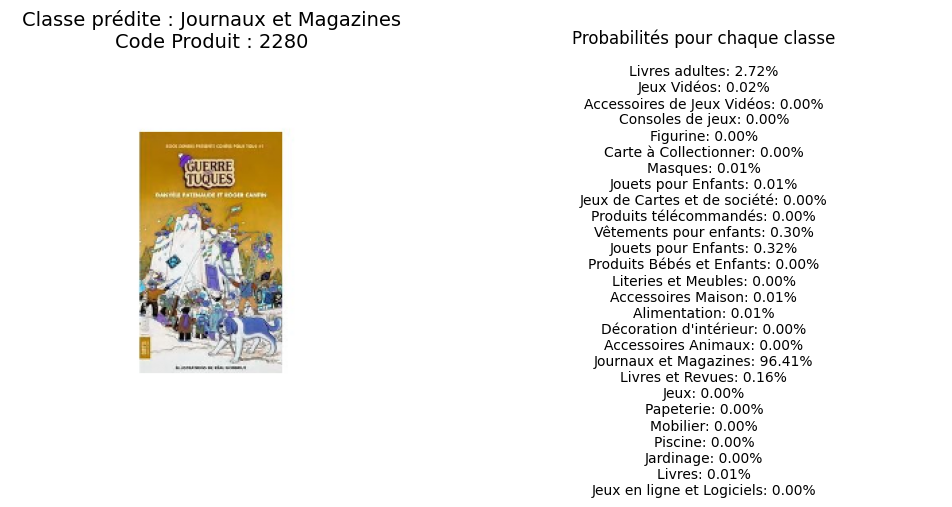

In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Chemin de l'image à prédire
img_path = '/mnt/c/Users/steph/OneDrive/Images/Rakuten/images/image_train/image_1077757786_product_278535884.jpg'

# Chargement de l'image avec OpenCV en utilisant cv2.IMREAD_COLOR
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

# Vérification du type de l'image
print("Type de l'image : ", img.dtype)

# Redimensionnement de l'image aux dimensions d'entrée du modèle (299x299)
img = cv2.resize(img, (299, 299))

# Modification de la profondeur de l'image en 8 bits (CV_8U) 
img = img.astype(np.uint8)

# Normalisation de l'image
img = img / 255.0

# Ajout d'une dimension pour correspondre aux attentes du modèle
img = np.expand_dims(img, axis=0)

# Prédiction avec le modèle xception
predictions = model.predict(img)

# Classe prédite en utilisant argmax
predicted_class = np.argmax(predictions, axis=1)

# Calcul des probabilités en pourcentage pour chaque classe
class_probabilities = predictions[0] * 100 

# Liste des labels
labels = ["Livres adultes", "Jeux Vidéos", "Accessoires de Jeux Vidéos", "Consoles de jeux", "Figurine", "Carte à Collectionner",
          "Masques", "Jouets pour Enfants", "Jeux de Cartes et de société", "Produits télécommandés",
          "Vêtements pour enfants", "Jouets pour Enfants", "Produits Bébés et Enfants",
          "Literies et Meubles", "Accessoires Maison", "Alimentation", "Décoration d'intérieur", "Accessoires Animaux",
          "Journaux et Magazines", "Livres et Revues", "Jeux", "Papeterie",
          "Mobilier", "Piscine", "Jardinage", "Livres", "Jeux en ligne et Logiciels"]

# Code produit associé aux classes
code_produit = [10, 40, 50, 60, 1140, 1160, 1180, 1280, 1281,
                1300, 1301, 1302, 1320, 1560, 1920, 1940, 2060,
                2220, 2280, 2403, 2462, 2522, 2582, 2583,
                2585, 2705, 2905]

# Association des classes prédites pour les labels et les codes produits
predicted_label = labels[predicted_class[0]]
predicted_code = code_produit[predicted_class[0]]

# Figure comprenant 1 ligne et 2 colonnes
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Affichage de la classe prédite avec la classe prédite et le code produit dans la première colonne 
axs[0].imshow(img[0])
axs[0].axis('off')
axs[0].set_title(f"Classe prédite : {predicted_label}\nCode Produit : {predicted_code}", ha='center', va='center', fontsize=14)

# Affichage des probabilités pour chaque classe dans la deuxième colonne
axs[1].text(0.5, 0.5, "", ha='center', va='center', fontsize=12)
for i, (label, prob) in enumerate(zip(labels, class_probabilities)):
    axs[1].text(0.5, 0.95 - 0.04 * i, f"{label}: {prob:.2f}%", ha='center', va='center', fontsize=10)
axs[1].axis('off')
axs[1].set_title('Probabilités pour chaque classe')

# Ajustement de l'espacement entre les graphiques
plt.tight_layout()

plt.show()


Type de l'image :  uint8
1/1 [==============================] - 0s 101ms/step


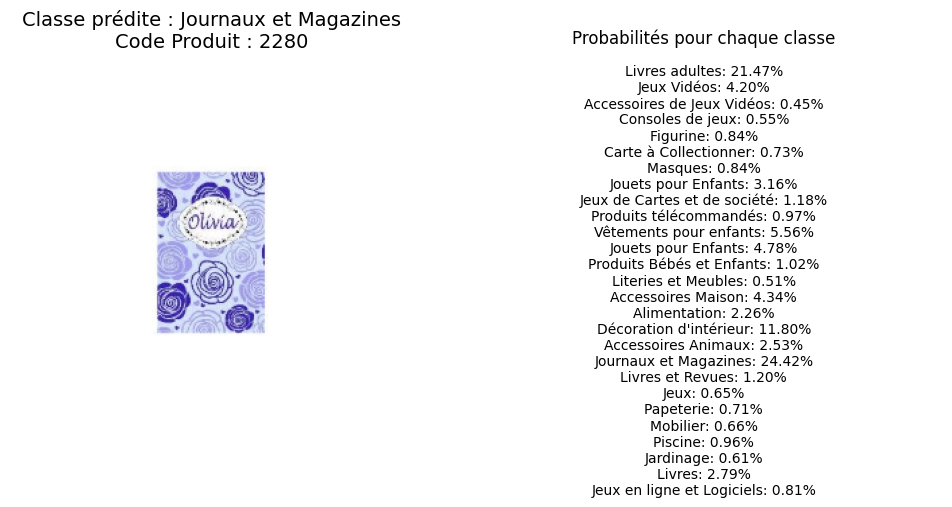

In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Chemin de l'image à prédire
img_path = '/mnt/c/Users/steph/OneDrive/Images/Rakuten/images/image_train/image_1263597046_product_3804725264.jpg'

# Chargement de l'image avec OpenCV en utilisant cv2.IMREAD_COLOR
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

# Vérification du type de l'image
print("Type de l'image : ", img.dtype)

# Redimensionnement de l'image aux dimensions d'entrée du modèle (299x299)
img = cv2.resize(img, (299, 299))

# Modification de la profondeur de l'image en 8 bits (CV_8U) 
img = img.astype(np.uint8)

# Normalisation de l'image
img = img / 255.0

# Ajout d'une dimension pour correspondre aux attentes du modèle
img = np.expand_dims(img, axis=0)

# Prédiction avec le modèle xception
predictions = model.predict(img)

# Classe prédite en utilisant argmax
predicted_class = np.argmax(predictions, axis=1)

# Calcul des probabilités en pourcentage pour chaque classe
class_probabilities = predictions[0] * 100 

# Liste des labels
labels = ["Livres adultes", "Jeux Vidéos", "Accessoires de Jeux Vidéos", "Consoles de jeux", "Figurine", "Carte à Collectionner",
          "Masques", "Jouets pour Enfants", "Jeux de Cartes et de société", "Produits télécommandés",
          "Vêtements pour enfants", "Jouets pour Enfants", "Produits Bébés et Enfants",
          "Literies et Meubles", "Accessoires Maison", "Alimentation", "Décoration d'intérieur", "Accessoires Animaux",
          "Journaux et Magazines", "Livres et Revues", "Jeux", "Papeterie",
          "Mobilier", "Piscine", "Jardinage", "Livres", "Jeux en ligne et Logiciels"]

# Code produit associé aux classes
code_produit = [10, 40, 50, 60, 1140, 1160, 1180, 1280, 1281,
                1300, 1301, 1302, 1320, 1560, 1920, 1940, 2060,
                2220, 2280, 2403, 2462, 2522, 2582, 2583,
                2585, 2705, 2905]

# Association des classes prédites pour les labels et les codes produits
predicted_label = labels[predicted_class[0]]
predicted_code = code_produit[predicted_class[0]]

# Figure comprenant 1 ligne et 2 colonnes
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Affichage de la classe prédite avec la classe prédite et le code produit dans la première colonne 
axs[0].imshow(img[0])
axs[0].axis('off')
axs[0].set_title(f"Classe prédite : {predicted_label}\nCode Produit : {predicted_code}", ha='center', va='center', fontsize=14)

# Affichage des probabilités pour chaque classe dans la deuxième colonne
axs[1].text(0.5, 0.5, "", ha='center', va='center', fontsize=12)
for i, (label, prob) in enumerate(zip(labels, class_probabilities)):
    axs[1].text(0.5, 0.95 - 0.04 * i, f"{label}: {prob:.2f}%", ha='center', va='center', fontsize=10)
axs[1].axis('off')
axs[1].set_title('Probabilités pour chaque classe')

# Ajustement de l'espacement entre les graphiques
plt.tight_layout()

plt.show()


Type de l'image :  uint8
1/1 [==============================] - 0s 97ms/step


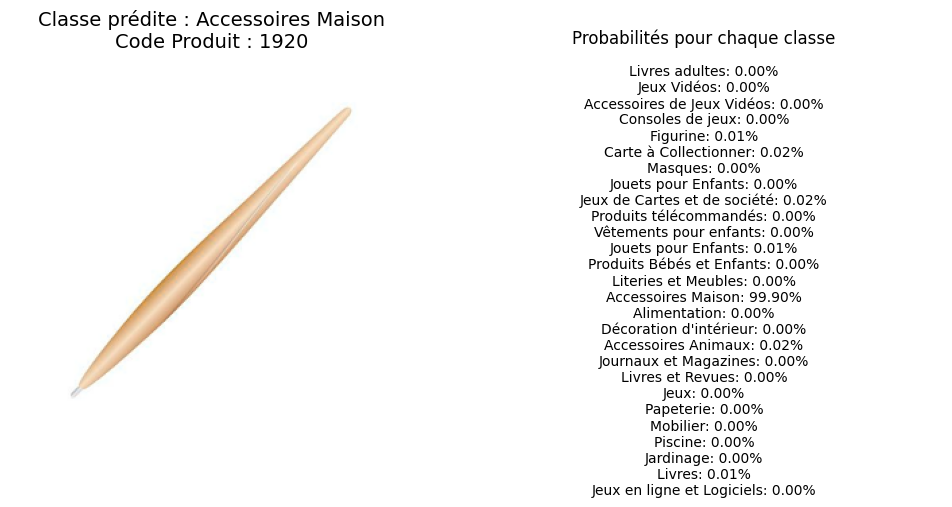

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Chemin de l'image à prédire
img_path = '/mnt/c/Users/steph/OneDrive/Images/Rakuten/images/image_train/image_938777978_product_201115110.jpg'

# Chargement de l'image avec OpenCV en utilisant cv2.IMREAD_COLOR
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

# Vérification du type de l'image
print("Type de l'image : ", img.dtype)

# Redimensionnement de l'image aux dimensions d'entrée du modèle (299x299)
img = cv2.resize(img, (299, 299))

# Modification de la profondeur de l'image en 8 bits (CV_8U) 
img = img.astype(np.uint8)

# Normalisation de l'image
img = img / 255.0

# Ajout d'une dimension pour correspondre aux attentes du modèle
img = np.expand_dims(img, axis=0)

# Prédiction avec le modèle xception
predictions = model.predict(img)

# Classe prédite en utilisant argmax
predicted_class = np.argmax(predictions, axis=1)

# Calcul des probabilités en pourcentage pour chaque classe
class_probabilities = predictions[0] * 100 

# Liste des labels
labels = ["Livres adultes", "Jeux Vidéos", "Accessoires de Jeux Vidéos", "Consoles de jeux", "Figurine", "Carte à Collectionner",
          "Masques", "Jouets pour Enfants", "Jeux de Cartes et de société", "Produits télécommandés",
          "Vêtements pour enfants", "Jouets pour Enfants", "Produits Bébés et Enfants",
          "Literies et Meubles", "Accessoires Maison", "Alimentation", "Décoration d'intérieur", "Accessoires Animaux",
          "Journaux et Magazines", "Livres et Revues", "Jeux", "Papeterie",
          "Mobilier", "Piscine", "Jardinage", "Livres", "Jeux en ligne et Logiciels"]

# Code produit associé aux classes
code_produit = [10, 40, 50, 60, 1140, 1160, 1180, 1280, 1281,
                1300, 1301, 1302, 1320, 1560, 1920, 1940, 2060,
                2220, 2280, 2403, 2462, 2522, 2582, 2583,
                2585, 2705, 2905]

# Association des classes prédites pour les labels et les codes produits
predicted_label = labels[predicted_class[0]]
predicted_code = code_produit[predicted_class[0]]

# Figure comprenant 1 ligne et 2 colonnes
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Affichage de la classe prédite avec la classe prédite et le code produit dans la première colonne 
axs[0].imshow(img[0])
axs[0].axis('off')
axs[0].set_title(f"Classe prédite : {predicted_label}\nCode Produit : {predicted_code}", ha='center', va='center', fontsize=14)

# Affichage des probabilités pour chaque classe dans la deuxième colonne
axs[1].text(0.5, 0.5, "", ha='center', va='center', fontsize=12)
for i, (label, prob) in enumerate(zip(labels, class_probabilities)):
    axs[1].text(0.5, 0.95 - 0.04 * i, f"{label}: {prob:.2f}%", ha='center', va='center', fontsize=10)
axs[1].axis('off')
axs[1].set_title('Probabilités pour chaque classe')

# Ajustement de l'espacement entre les graphiques
plt.tight_layout()

plt.show()


Type de l'image :  uint8
1/1 [==============================] - 0s 90ms/step


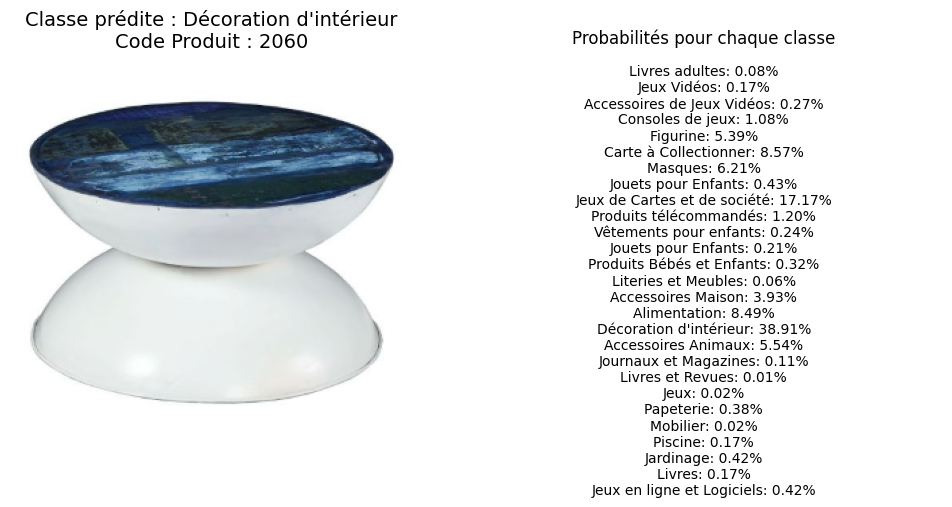

In [42]:
#  OUI

import cv2
import matplotlib.pyplot as plt
import numpy as np

# Chemin de l'image à prédire
img_path = '/mnt/c/Users/steph/OneDrive/Images/Rakuten/images/image_train/image_1267353403_product_3942400296.jpg'

# Chargement de l'image avec OpenCV en utilisant cv2.IMREAD_COLOR
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

# Vérification du type de l'image
print("Type de l'image : ", img.dtype)

# Redimensionnement de l'image aux dimensions d'entrée du modèle (299x299)
img = cv2.resize(img, (299, 299))

# Modification de la profondeur de l'image en 8 bits (CV_8U) 
img = img.astype(np.uint8)

# Normalisation de l'image
img = img / 255.0

# Ajout d'une dimension pour correspondre aux attentes du modèle
img = np.expand_dims(img, axis=0)

# Prédiction avec le modèle xception
predictions = model.predict(img)

# Classe prédite en utilisant argmax
predicted_class = np.argmax(predictions, axis=1)

# Calcul des probabilités en pourcentage pour chaque classe
class_probabilities = predictions[0] * 100 

# Liste des labels
labels = ["Livres adultes", "Jeux Vidéos", "Accessoires de Jeux Vidéos", "Consoles de jeux", "Figurine", "Carte à Collectionner",
          "Masques", "Jouets pour Enfants", "Jeux de Cartes et de société", "Produits télécommandés",
          "Vêtements pour enfants", "Jouets pour Enfants", "Produits Bébés et Enfants",
          "Literies et Meubles", "Accessoires Maison", "Alimentation", "Décoration d'intérieur", "Accessoires Animaux",
          "Journaux et Magazines", "Livres et Revues", "Jeux", "Papeterie",
          "Mobilier", "Piscine", "Jardinage", "Livres", "Jeux en ligne et Logiciels"]

# Code produit associé aux classes
code_produit = [10, 40, 50, 60, 1140, 1160, 1180, 1280, 1281,
                1300, 1301, 1302, 1320, 1560, 1920, 1940, 2060,
                2220, 2280, 2403, 2462, 2522, 2582, 2583,
                2585, 2705, 2905]

# Association des classes prédites pour les labels et les codes produits
predicted_label = labels[predicted_class[0]]
predicted_code = code_produit[predicted_class[0]]

# Figure comprenant 1 ligne et 2 colonnes
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Affichage de la classe prédite avec la classe prédite et le code produit dans la première colonne 
axs[0].imshow(img[0])
axs[0].axis('off')
axs[0].set_title(f"Classe prédite : {predicted_label}\nCode Produit : {predicted_code}", ha='center', va='center', fontsize=14)

# Affichage des probabilités pour chaque classe dans la deuxième colonne
axs[1].text(0.5, 0.5, "", ha='center', va='center', fontsize=12)
for i, (label, prob) in enumerate(zip(labels, class_probabilities)):
    axs[1].text(0.5, 0.95 - 0.04 * i, f"{label}: {prob:.2f}%", ha='center', va='center', fontsize=10)
axs[1].axis('off')
axs[1].set_title('Probabilités pour chaque classe')

# Ajustement de l'espacement entre les graphiques
plt.tight_layout()

plt.show()


Type de l'image :  uint8
1/1 [==============================] - 0s 89ms/step


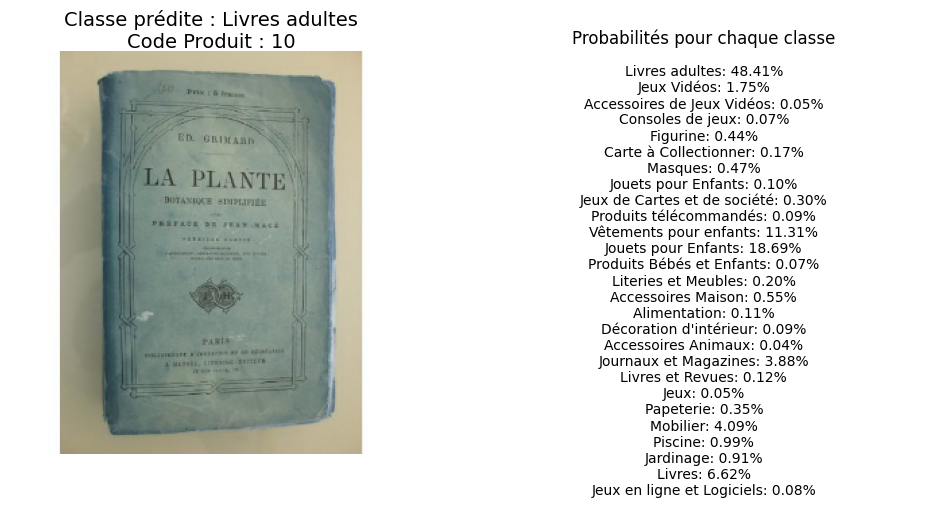

In [46]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Chemin de l'image à prédire
img_path = '/mnt/c/Users/steph/OneDrive/Images/Rakuten/images/image_train/image_1043104180_product_847405813.jpg'

# Chargement de l'image avec OpenCV en utilisant cv2.IMREAD_COLOR
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

# Vérification du type de l'image
print("Type de l'image : ", img.dtype)

# Redimensionnement de l'image aux dimensions d'entrée du modèle (299x299)
img = cv2.resize(img, (299, 299))

# Modification de la profondeur de l'image en 8 bits (CV_8U) 
img = img.astype(np.uint8)

# Normalisation de l'image
img = img / 255.0

# Ajout d'une dimension pour correspondre aux attentes du modèle
img = np.expand_dims(img, axis=0)

# Prédiction avec le modèle xception
predictions = model.predict(img)

# Classe prédite en utilisant argmax
predicted_class = np.argmax(predictions, axis=1)

# Calcul des probabilités en pourcentage pour chaque classe
class_probabilities = predictions[0] * 100 

# Liste des labels
labels = ["Livres adultes", "Jeux Vidéos", "Accessoires de Jeux Vidéos", "Consoles de jeux", "Figurine", "Carte à Collectionner",
          "Masques", "Jouets pour Enfants", "Jeux de Cartes et de société", "Produits télécommandés",
          "Vêtements pour enfants", "Jouets pour Enfants", "Produits Bébés et Enfants",
          "Literies et Meubles", "Accessoires Maison", "Alimentation", "Décoration d'intérieur", "Accessoires Animaux",
          "Journaux et Magazines", "Livres et Revues", "Jeux", "Papeterie",
          "Mobilier", "Piscine", "Jardinage", "Livres", "Jeux en ligne et Logiciels"]

# Code produit associé aux classes
code_produit = [10, 40, 50, 60, 1140, 1160, 1180, 1280, 1281,
                1300, 1301, 1302, 1320, 1560, 1920, 1940, 2060,
                2220, 2280, 2403, 2462, 2522, 2582, 2583,
                2585, 2705, 2905]

# Association des classes prédites pour les labels et les codes produits
predicted_label = labels[predicted_class[0]]
predicted_code = code_produit[predicted_class[0]]

# Figure comprenant 1 ligne et 2 colonnes
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Affichage de la classe prédite avec la classe prédite et le code produit dans la première colonne 
axs[0].imshow(img[0])
axs[0].axis('off')
axs[0].set_title(f"Classe prédite : {predicted_label}\nCode Produit : {predicted_code}", ha='center', va='center', fontsize=14)

# Affichage des probabilités pour chaque classe dans la deuxième colonne
axs[1].text(0.5, 0.5, "", ha='center', va='center', fontsize=12)
for i, (label, prob) in enumerate(zip(labels, class_probabilities)):
    axs[1].text(0.5, 0.95 - 0.04 * i, f"{label}: {prob:.2f}%", ha='center', va='center', fontsize=10)
axs[1].axis('off')
axs[1].set_title('Probabilités pour chaque classe')

# Ajustement de l'espacement entre les graphiques
plt.tight_layout()

plt.show()


Type de l'image :  uint8
1/1 [==============================] - 0s 80ms/step


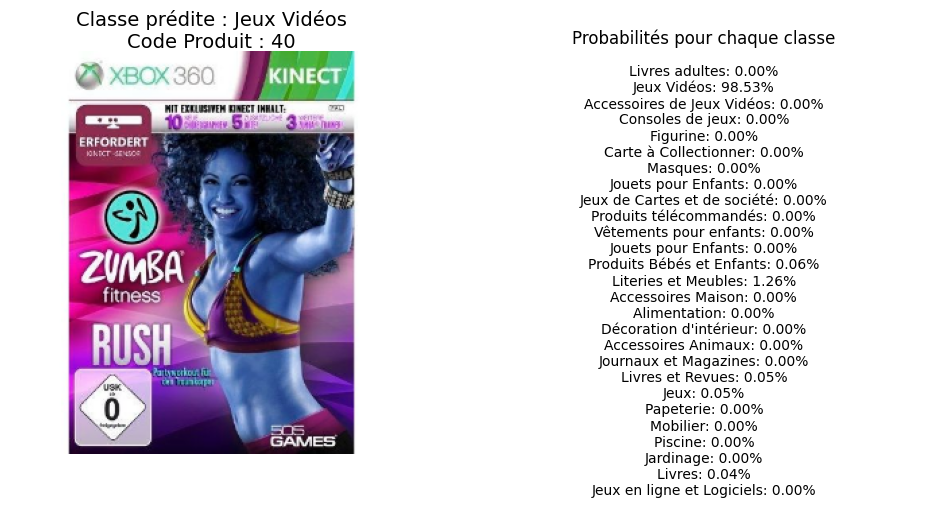

In [53]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Chemin de l'image à prédire
img_path = '/mnt/c/Users/steph/OneDrive/Images/Rakuten/images/image_train/image_933233675_product_190091299.jpg'

# Chargement de l'image avec OpenCV en utilisant cv2.IMREAD_COLOR
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

# Vérification du type de l'image
print("Type de l'image : ", img.dtype)

# Redimensionnement de l'image aux dimensions d'entrée du modèle (299x299)
img = cv2.resize(img, (299, 299))

# Modification de la profondeur de l'image en 8 bits (CV_8U) 
img = img.astype(np.uint8)

# Normalisation de l'image
img = img / 255.0

# Ajout d'une dimension pour correspondre aux attentes du modèle
img = np.expand_dims(img, axis=0)

# Prédiction avec le modèle xception
predictions = model.predict(img)

# Classe prédite en utilisant argmax
predicted_class = np.argmax(predictions, axis=1)

# Calcul des probabilités en pourcentage pour chaque classe
class_probabilities = predictions[0] * 100 

# Liste des labels
labels = ["Livres adultes", "Jeux Vidéos", "Accessoires de Jeux Vidéos", "Consoles de jeux", "Figurine", "Carte à Collectionner",
          "Masques", "Jouets pour Enfants", "Jeux de Cartes et de société", "Produits télécommandés",
          "Vêtements pour enfants", "Jouets pour Enfants", "Produits Bébés et Enfants",
          "Literies et Meubles", "Accessoires Maison", "Alimentation", "Décoration d'intérieur", "Accessoires Animaux",
          "Journaux et Magazines", "Livres et Revues", "Jeux", "Papeterie",
          "Mobilier", "Piscine", "Jardinage", "Livres", "Jeux en ligne et Logiciels"]

# Code produit associé aux classes
code_produit = [10, 40, 50, 60, 1140, 1160, 1180, 1280, 1281,
                1300, 1301, 1302, 1320, 1560, 1920, 1940, 2060,
                2220, 2280, 2403, 2462, 2522, 2582, 2583,
                2585, 2705, 2905]

# Association des classes prédites pour les labels et les codes produits
predicted_label = labels[predicted_class[0]]
predicted_code = code_produit[predicted_class[0]]

# Figure comprenant 1 ligne et 2 colonnes
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Affichage de la classe prédite avec la classe prédite et le code produit dans la première colonne 
axs[0].imshow(img[0])
axs[0].axis('off')
axs[0].set_title(f"Classe prédite : {predicted_label}\nCode Produit : {predicted_code}", ha='center', va='center', fontsize=14)

# Affichage des probabilités pour chaque classe dans la deuxième colonne
axs[1].text(0.5, 0.5, "", ha='center', va='center', fontsize=12)
for i, (label, prob) in enumerate(zip(labels, class_probabilities)):
    axs[1].text(0.5, 0.95 - 0.04 * i, f"{label}: {prob:.2f}%", ha='center', va='center', fontsize=10)
axs[1].axis('off')
axs[1].set_title('Probabilités pour chaque classe')

# Ajustement de l'espacement entre les graphiques
plt.tight_layout()

plt.show()


Type de l'image :  uint8
1/1 [==============================] - 0s 90ms/step


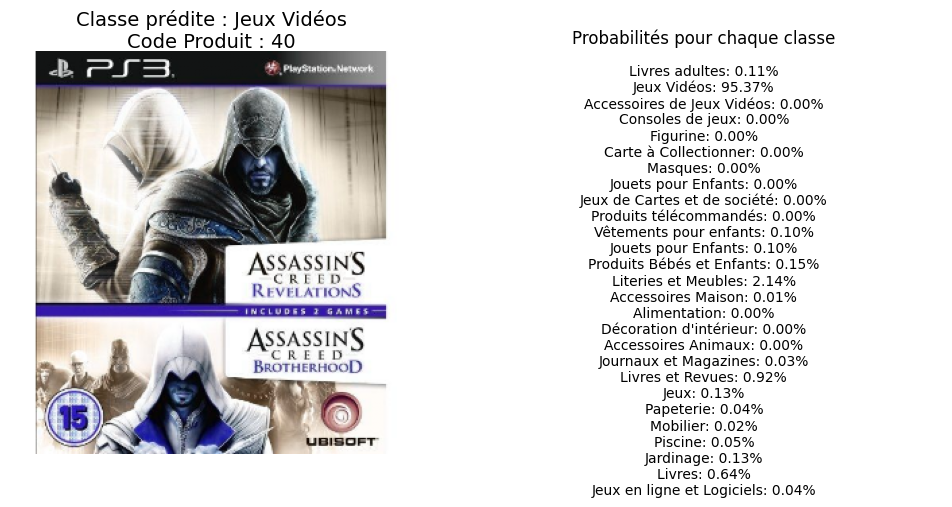

In [56]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Chemin de l'image à prédire
img_path = '/mnt/c/Users/steph/OneDrive/Images/Rakuten/images/image_train/image_955658863_product_220267350.jpg'

# Chargement de l'image avec OpenCV en utilisant cv2.IMREAD_COLOR
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

# Vérification du type de l'image
print("Type de l'image : ", img.dtype)

# Redimensionnement de l'image aux dimensions d'entrée du modèle (299x299)
img = cv2.resize(img, (299, 299))

# Modification de la profondeur de l'image en 8 bits (CV_8U) 
img = img.astype(np.uint8)

# Normalisation de l'image
img = img / 255.0

# Ajout d'une dimension pour correspondre aux attentes du modèle
img = np.expand_dims(img, axis=0)

# Prédiction avec le modèle xception
predictions = model.predict(img)

# Classe prédite en utilisant argmax
predicted_class = np.argmax(predictions, axis=1)

# Calcul des probabilités en pourcentage pour chaque classe
class_probabilities = predictions[0] * 100 

# Liste des labels
labels = ["Livres adultes", "Jeux Vidéos", "Accessoires de Jeux Vidéos", "Consoles de jeux", "Figurine", "Carte à Collectionner",
          "Masques", "Jouets pour Enfants", "Jeux de Cartes et de société", "Produits télécommandés",
          "Vêtements pour enfants", "Jouets pour Enfants", "Produits Bébés et Enfants",
          "Literies et Meubles", "Accessoires Maison", "Alimentation", "Décoration d'intérieur", "Accessoires Animaux",
          "Journaux et Magazines", "Livres et Revues", "Jeux", "Papeterie",
          "Mobilier", "Piscine", "Jardinage", "Livres", "Jeux en ligne et Logiciels"]

# Code produit associé aux classes
code_produit = [10, 40, 50, 60, 1140, 1160, 1180, 1280, 1281,
                1300, 1301, 1302, 1320, 1560, 1920, 1940, 2060,
                2220, 2280, 2403, 2462, 2522, 2582, 2583,
                2585, 2705, 2905]

# Association des classes prédites pour les labels et les codes produits
predicted_label = labels[predicted_class[0]]
predicted_code = code_produit[predicted_class[0]]

# Figure comprenant 1 ligne et 2 colonnes
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Affichage de la classe prédite avec la classe prédite et le code produit dans la première colonne 
axs[0].imshow(img[0])
axs[0].axis('off')
axs[0].set_title(f"Classe prédite : {predicted_label}\nCode Produit : {predicted_code}", ha='center', va='center', fontsize=14)

# Affichage des probabilités pour chaque classe dans la deuxième colonne
axs[1].text(0.5, 0.5, "", ha='center', va='center', fontsize=12)
for i, (label, prob) in enumerate(zip(labels, class_probabilities)):
    axs[1].text(0.5, 0.95 - 0.04 * i, f"{label}: {prob:.2f}%", ha='center', va='center', fontsize=10)
axs[1].axis('off')
axs[1].set_title('Probabilités pour chaque classe')

# Ajustement de l'espacement entre les graphiques
plt.tight_layout()

plt.show()


Type de l'image :  uint8
1/1 [==============================] - 0s 92ms/step


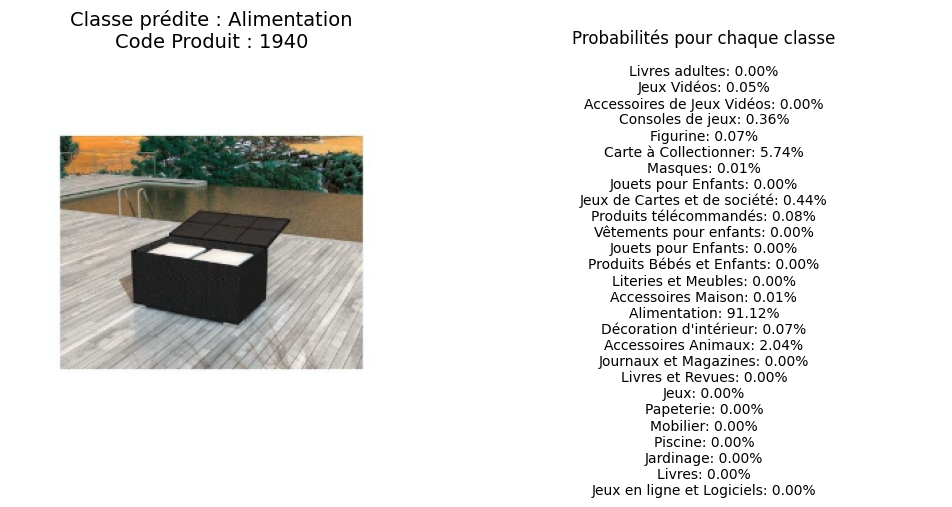

In [126]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Chemin de l'image à prédire
img_path = '/mnt/c/Users/steph/OneDrive/Images/Rakuten/images/image_train/image_1258618665_product_3886016081.jpg'

# Chargement de l'image avec OpenCV en utilisant cv2.IMREAD_COLOR
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

# Vérification du type de l'image
print("Type de l'image : ", img.dtype)

# Redimensionnement de l'image aux dimensions d'entrée du modèle (299x299)
img = cv2.resize(img, (299, 299))

# Modification de la profondeur de l'image en 8 bits (CV_8U) 
img = img.astype(np.uint8)

# Normalisation de l'image
img = img / 255.0

# Ajout d'une dimension pour correspondre aux attentes du modèle
img = np.expand_dims(img, axis=0)

# Prédiction avec le modèle xception
predictions = model.predict(img)

# Classe prédite en utilisant argmax
predicted_class = np.argmax(predictions, axis=1)

# Calcul des probabilités en pourcentage pour chaque classe
class_probabilities = predictions[0] * 100 

# Liste des labels
labels = ["Livres adultes", "Jeux Vidéos", "Accessoires de Jeux Vidéos", "Consoles de jeux", "Figurine", "Carte à Collectionner",
          "Masques", "Jouets pour Enfants", "Jeux de Cartes et de société", "Produits télécommandés",
          "Vêtements pour enfants", "Jouets pour Enfants", "Produits Bébés et Enfants",
          "Literies et Meubles", "Accessoires Maison", "Alimentation", "Décoration d'intérieur", "Accessoires Animaux",
          "Journaux et Magazines", "Livres et Revues", "Jeux", "Papeterie",
          "Mobilier", "Piscine", "Jardinage", "Livres", "Jeux en ligne et Logiciels"]

# Code produit associé aux classes
code_produit = [10, 40, 50, 60, 1140, 1160, 1180, 1280, 1281,
                1300, 1301, 1302, 1320, 1560, 1920, 1940, 2060,
                2220, 2280, 2403, 2462, 2522, 2582, 2583,
                2585, 2705, 2905]

# Association des classes prédites pour les labels et les codes produits
predicted_label = labels[predicted_class[0]]
predicted_code = code_produit[predicted_class[0]]

# Figure comprenant 1 ligne et 2 colonnes
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Affichage de la classe prédite avec la classe prédite et le code produit dans la première colonne 
axs[0].imshow(img[0])
axs[0].axis('off')
axs[0].set_title(f"Classe prédite : {predicted_label}\nCode Produit : {predicted_code}", ha='center', va='center', fontsize=14)

# Affichage des probabilités pour chaque classe dans la deuxième colonne
axs[1].text(0.5, 0.5, "", ha='center', va='center', fontsize=12)
for i, (label, prob) in enumerate(zip(labels, class_probabilities)):
    axs[1].text(0.5, 0.95 - 0.04 * i, f"{label}: {prob:.2f}%", ha='center', va='center', fontsize=10)
axs[1].axis('off')
axs[1].set_title('Probabilités pour chaque classe')

# Ajustement de l'espacement entre les graphiques
plt.tight_layout()

plt.show()
